In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import os 
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image
from keras.models import load_model
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array


In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive',force_remount=True)


Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/MyDrive/wetransfer_cats_and_dogs_2023-05-04_2110')

In [ ]:
# set directory to the parent directory of the class directories
dir_path = '/content/gdrive/MyDrive/wetransfer_cats_and_dogs_2023-05-04_2110/cats_and_dogs/test'

# list the subdirectories (i.e. class directories)
subdirs = ['cats', 'dogs']

# loop through each subdirectory and count the number of files
for subdir in subdirs:
    subdir_path = os.path.join(dir_path, subdir)
    files = os.listdir(subdir_path)
    num_images = len(files)
    print("Number of images in test", subdir, "class:", num_images)


Number of images in test cats class: 70
Number of images in test dogs class: 70


In [ ]:
# set directory to the parent directory of the class directories
dir_path = '/content/gdrive/MyDrive/wetransfer_cats_and_dogs_2023-05-04_2110/cats_and_dogs/train'

# list the subdirectories (i.e. class directories)
subdirs = ['cats', 'dogs']

# loop through each subdirectory and count the number of files
for subdir in subdirs:
    subdir_path = os.path.join(dir_path, subdir)
    files = os.listdir(subdir_path)
    num_images = len(files)
    print("Number of images in train", subdir, "class:", num_images)


Number of images in train cats class: 279
Number of images in train dogs class: 278


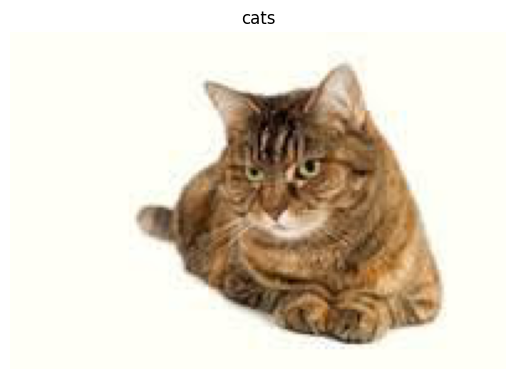

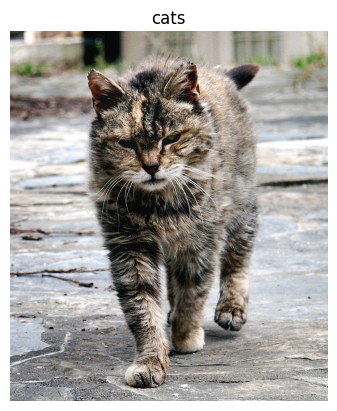

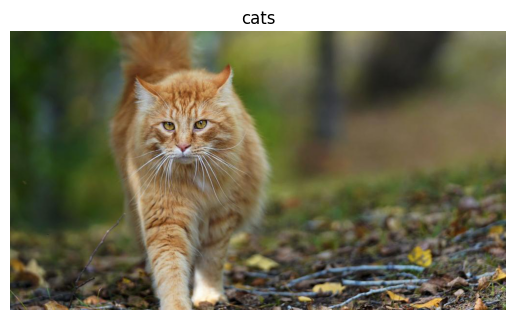

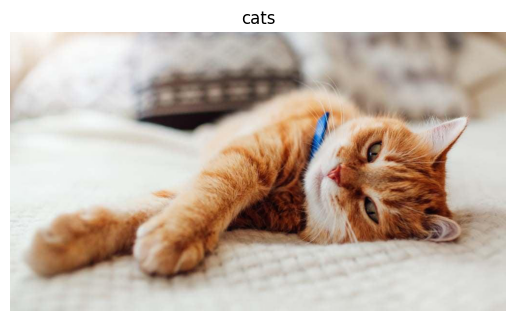

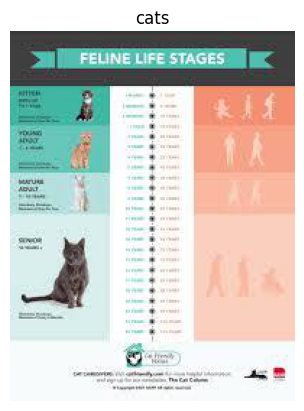

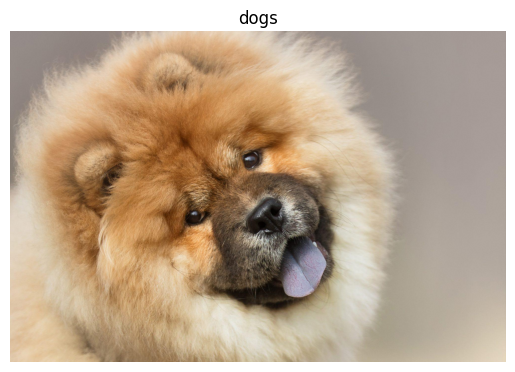

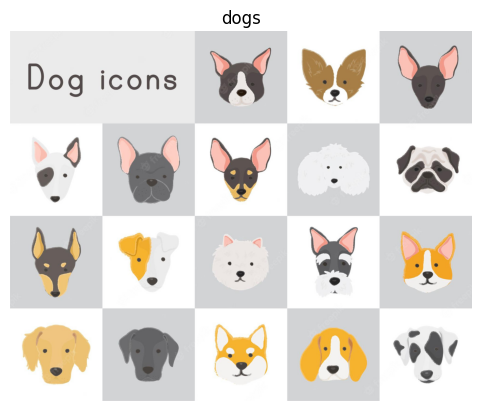

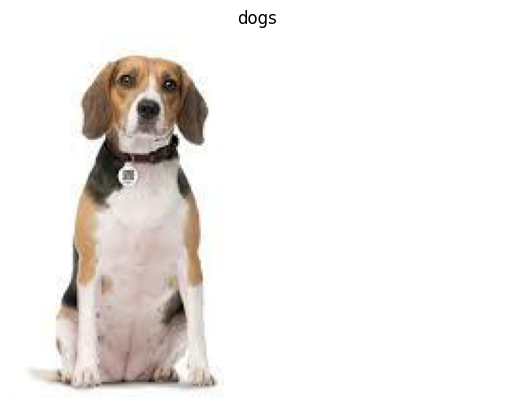

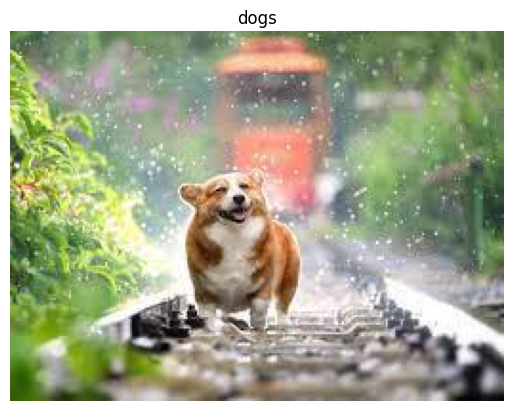

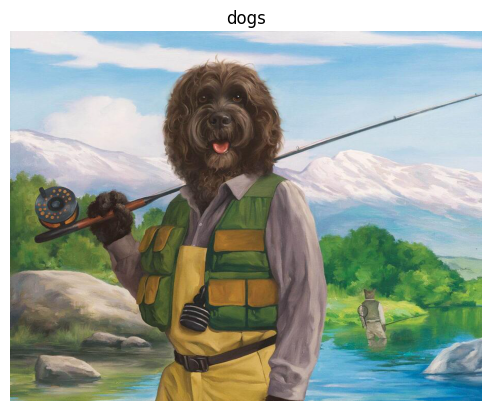

In [ ]:
for subdir in subdirs:
    subdir_path = os.path.join(dir_path, subdir)
    files = os.listdir(subdir_path)
    
    # plot the first 5 images in the subdirectory
    num_images = 5
    for i in range(num_images):
        img_path = os.path.join(subdir_path, files[i])
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(subdir)
        plt.axis('off')
        plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/wetransfer_cats_and_dogs_2023-05-04_2110/cats_and_dogs/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 557 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255
)

test_generator = test_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/wetransfer_cats_and_dogs_2023-05-04_2110/cats_and_dogs/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 140 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples/test_generator.batch_size
)

Epoch 1/10
17/17 [==============================] - 86s 5s/step - loss: 3.5476 - accuracy: 0.4722 - val_loss: 0.8035 - val_accuracy: 0.5714
Epoch 2/10
17/17 [==============================] - 25s 1s/step - loss: 0.8335 - accuracy: 0.5314 - val_loss: 0.7061 - val_accuracy: 0.5500
Epoch 3/10
17/17 [==============================] - 26s 1s/step - loss: 0.6980 - accuracy: 0.6014 - val_loss: 0.7108 - val_accuracy: 0.5643
Epoch 4/10
17/17 [==============================] - 25s 1s/step - loss: 0.6538 - accuracy: 0.6158 - val_loss: 0.7353 - val_accuracy: 0.5429
Epoch 5/10
17/17 [==============================] - 30s 2s/step - loss: 0.6085 - accuracy: 0.6894 - val_loss: 0.6823 - val_accuracy: 0.6714
Epoch 6/10
17/17 [==============================] - 27s 1s/step - loss: 0.5928 - accuracy: 0.6948 - val_loss: 0.9103 - val_accuracy: 0.5571
Epoch 7/10
17/17 [==============================] - 27s 2s/step - loss: 0.6238 - accuracy: 0.6930 - val_loss: 0.7180 - val_accuracy: 0.5929
Epoch 8/10
17/17 [==

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/wetransfer_cats_and_dogs_2023-05-04_2110/cats_and_dogs/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=40,
    validation_data=test_generator,
    validation_steps=test_generator.samples/test_generator.batch_size
)

Found 140 images belonging to 2 classes.
Epoch 1/40
17/17 [==============================] - 39s 2s/step - loss: 0.8385 - accuracy: 0.5153 - val_loss: 0.7067 - val_accuracy: 0.5000
Epoch 2/40
17/17 [==============================] - 37s 2s/step - loss: 0.6753 - accuracy: 0.5619 - val_loss: 0.6846 - val_accuracy: 0.5714
Epoch 3/40
17/17 [==============================] - 37s 2s/step - loss: 0.6798 - accuracy: 0.5548 - val_loss: 0.7122 - val_accuracy: 0.5500
Epoch 4/40
17/17 [==============================] - 37s 2s/step - loss: 0.6565 - accuracy: 0.6194 - val_loss: 0.8343 - val_accuracy: 0.5429
Epoch 5/40
17/17 [==============================] - 37s 2s/step - loss: 0.6325 - accuracy: 0.6284 - val_loss: 0.6681 - val_accuracy: 0.6214
Epoch 6/40
17/17 [==============================] - 35s 2s/step - loss: 0.6362 - accuracy: 0.6571 - val_loss: 0.6665 - val_accuracy: 0.6000
Epoch 7/40
17/17 [==============================] - 37s 2s/step - loss: 0.6091 - accuracy: 0.6786 - val_loss: 0.6704 - 

5/5 [==============================] - 5s 967ms/step


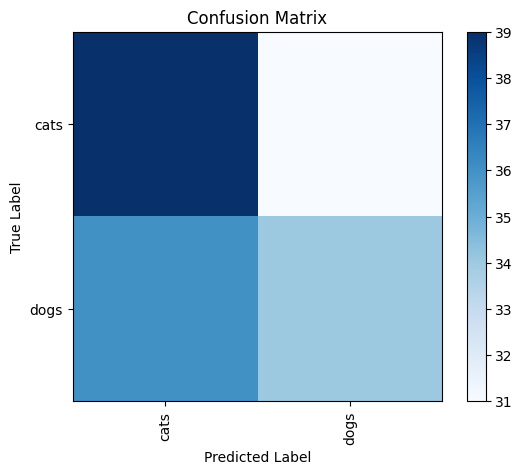

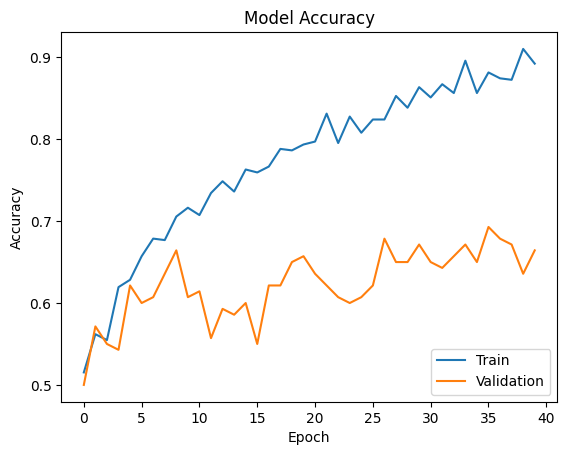

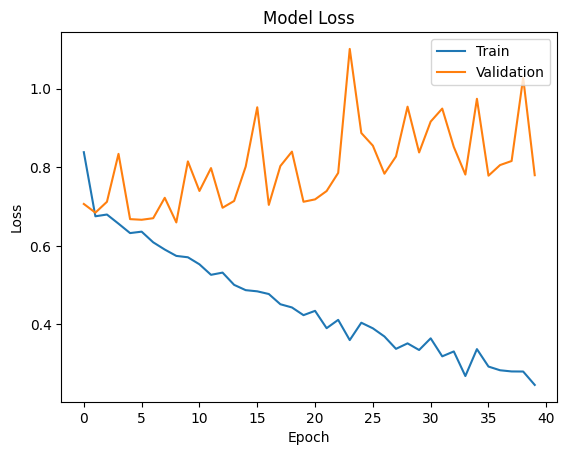

In [ ]:
# make predictions on test set
y_pred = model.predict(test_generator)
y_pred_classes = np.round(y_pred)

# generate confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred_classes)

# plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices.keys(), rotation=90)
plt.yticks(tick_marks, test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# plot accuracy/loss curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [ ]:
#Model accuracy
#The validation set is used to evaluate the performance of the model on new unseen data.
# The model learns from the training set and tries to generalize its learning to the validation set. 
#However, the validation set is not used for training, so the model may not perform as well on the validation set compared to the training set.


# Confusion matrix 

#In this example and thanks to the confusion matrix, we can see that the model correctly classified most of the images (31 images out of 40) in the two classes, 
#but had difficulties to distinguish some images of cats and dogs.
# In particular, it confused 5 images of cats with dogs, and 4 images of dogs with cats.

In [25]:
# Charger le modèle
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Charger l'image
from PIL import Image

# Load image
image = Image.open('/content/drive/MyDrive/Kitty_cat.jpeg')

# Resize image
image = image.resize((150, 150))

# Convert image to numpy array
image_array = np.array(image)

# Reshape array to fit model input shape
image_array = image_array.reshape(1, 150, 150, 3)

# Normalize pixel values
image_array = image_array / 255.0

# Make prediction with model
prediction = model.predict(image_array)

if prediction < 0.5:
    print("C'est un chat !")
else:
    print("C'est un chien !")

print(prediction)


1/1 [==============================] - 0s 146ms/step
[[0.47382823]]
C'est un chat !
